In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical , plot_model
from keras import backend as k
from keras.layers import Dense
#from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Dense , Activation ,Flatten


In [ ]:
import random
random.seed(0)

#ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from keras.layers import Conv2D ,MaxPooling2D

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


label : 5


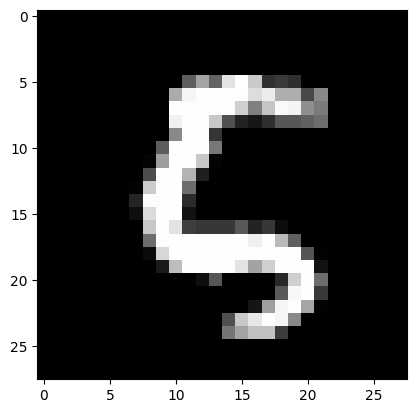

In [ ]:
print("label : {}".format(y_train[2000]))
plt.imshow(x_train[2000],cmap = 'gray')

In [ ]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)

print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
#reshaping the dataset
#in this format  number_of_example,number_of_height,number_of_weights,number_of_channels

x_train = x_train.reshape(x_train.shape[0],28,28,1)

x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
#normalizing  our data

x_train = x_train.astype('float32')

x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
#changing the integer to categorical class

y_train = to_categorical(y_train,num_classes = 10)
y_test = to_categorical(y_test,num_classes = 10)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = 3,activation = "relu",input_shape = (28,28,1)))
model.add(Conv2D(filters = 32,kernel_size = 3,activation = "relu"))

model.add(Flatten())
model.add(Dense(128,activation = "relu"))
model.add(Dense(10,activation = "softmax"))

In [ ]:
model.compile(loss = "catergorical_crossentropy", metrics = ["accuracy"],optimizer = "adam")

In [ ]:
h = model.fit(x = x_train,y = y_train,epochs = 10,batch_size = 32,validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 12s 6ms/step - loss: 0.1357 - accuracy: 0.9581 - val_loss: 0.0654 - val_accuracy: 0.9798
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0418 - accuracy: 0.9870 - val_loss: 0.0564 - val_accuracy: 0.9829
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.0540 - val_accuracy: 0.9853
Epoch 4/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0162 - accuracy: 0.9945 - val_loss: 0.0711 - val_accuracy: 0.9817
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0114 - accuracy: 0.9960 - val_loss: 0.0693 - val_accuracy: 0.9831
Epoch 6/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0726 - val_accuracy: 0.9844
Epoch 7/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0093 - accuracy: 0.9970 - val_loss: 0.0867 - val_accuracy

In [ ]:
loss,acc = model.evaluate(x_test,y_test)
print("\nTest Accuracy : %.2f%%" % (100*acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0600 - accuracy: 0.9875

Test Accuracy : 98.75%


In [ ]:
loss,acc = model.evaluate(x_train,y_train)
print("\nTrain Accuracy : %.2f%%" % (100*acc))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0255 - accuracy: 0.9954

Train Accuracy : 99.54%


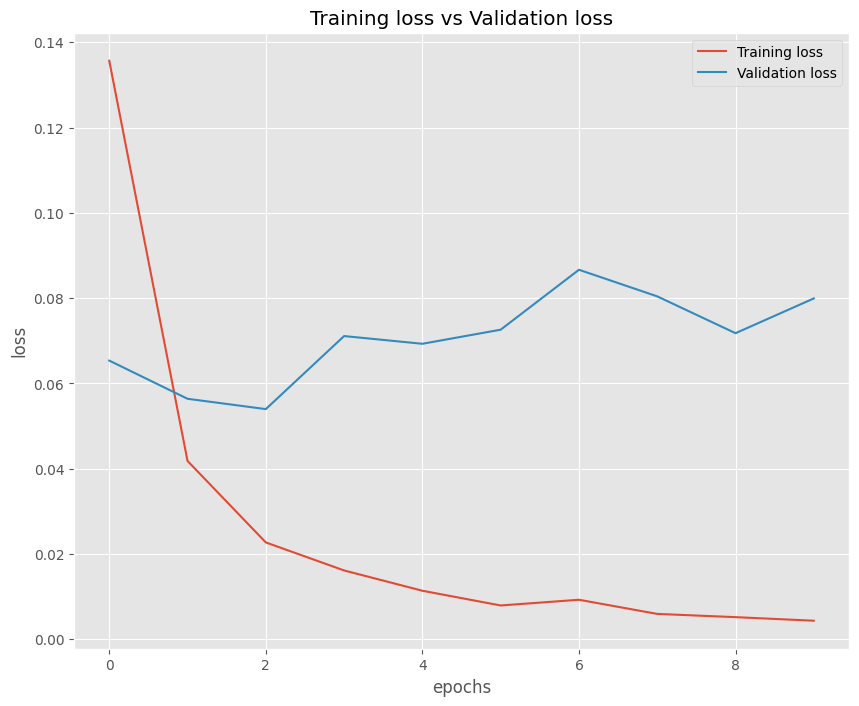

In [ ]:
epochs = np.arange(0,len(h.history['loss']))

plt.figure(figsize = (10,8))

plt.style.use("ggplot")

plt.plot(epochs,h.history['loss'],label = "Training loss")
plt.plot(epochs,h.history['val_loss'],label = "Validation loss")

plt.title("Training loss vs Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [ ]:
from keras.layers import MaxPooling2D
from keras.layers import Dropout
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = 3,activation = "relu",input_shape = (28,28,1)))
model.add(Conv2D(filters = 32,kernel_size = 3,activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.2))
model.add(Flatten())
model.add(Dense(128,activation = "relu"))
#model.add(Dropout(rate = 0.2))
model.add(Dense(10,activation = "Softmax"))


In [ ]:
model.compile(loss = "categorical_crossentropy",metrics = ["accuracy"],optimizer = "adam")
callbacks = tensorflow.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',patience = 2,min_delta = 0.01)#minimum change in the value
h = model.fit(x = x_train,y = y_train, batch_size = 32,epochs = 10,validation_data = (x_test,y_test),callbacks = [callbacks])


Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.1307 - accuracy: 0.9607 - val_loss: 0.0671 - val_accuracy: 0.9780
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0450 - accuracy: 0.9863 - val_loss: 0.0368 - val_accuracy: 0.9878
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0304 - accuracy: 0.9898 - val_loss: 0.0339 - val_accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.0323 - val_accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0171 - accuracy: 0.9941 - val_loss: 0.0371 - val_accuracy: 0.9909


In [ ]:
loss,acc = model.evaluate(x_test,y_test)
print("\nTest Accuracy : %.2f%%" % (100*acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.0371 - accuracy: 0.9909

Test Accuracy : 99.09%


In [ ]:
loss,acc = model.evaluate(x_train,y_train)
print("\nTrain Accuracy : %.2f%%" % (100*acc))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0075 - accuracy: 0.9974

Train Accuracy : 99.74%


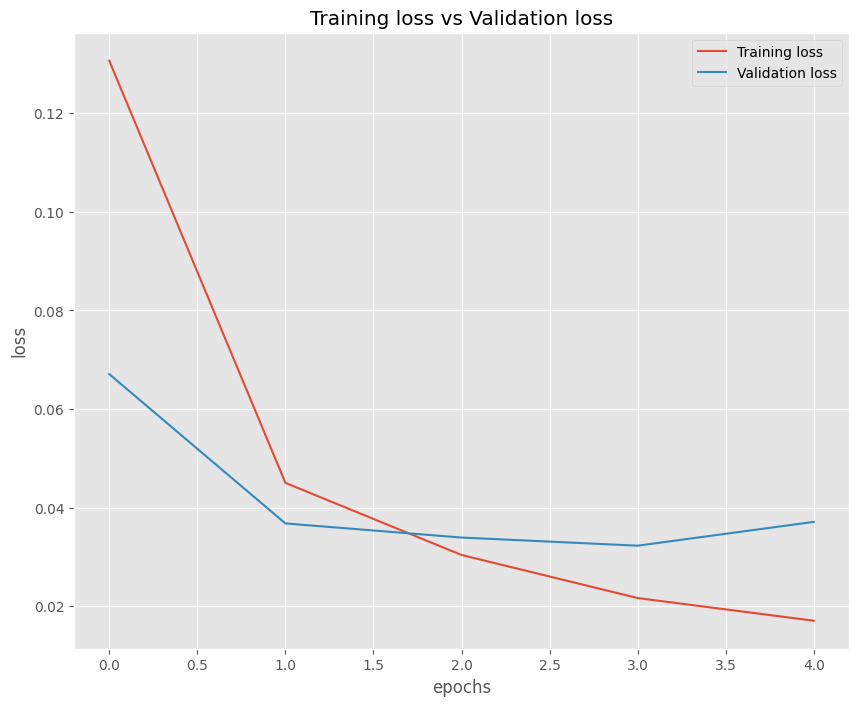

In [ ]:
epochs = np.arange(0,len(h.history['loss']))

plt.figure(figsize = (10,8))

plt.style.use("ggplot")

plt.plot(epochs,h.history['loss'],label = "Training loss")
plt.plot(epochs,h.history['val_loss'],label = "Validation loss")

plt.title("Training loss vs Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

1/1 [==============================] - 0s 18ms/step
predicted output: 8
input given


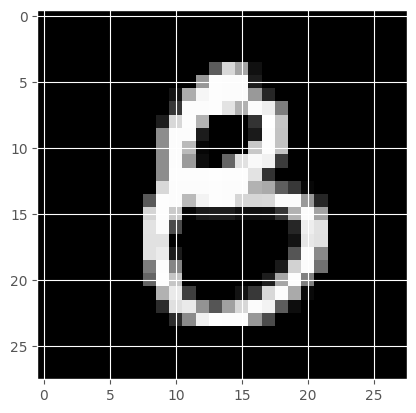

In [ ]:

plt.imshow(x_test[800].reshape(28,28),cmap = 'gray')

y_pred = model.predict(x_test[800].reshape(1,28,28,1))

print("predicted output: {}".format(y_pred.argmax()))
print("input given")